# Content
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

# Question : Task Details
Can we predict the possibility of a booking for a hotel based on the previous_cancellation as the target?

In [39]:
#read the dataset
import pandas as pd
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Get the insight from the data.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
df.shape

(119390, 32)

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [41]:
#removing unnecessary 488 data from the dataset in order to clean the dataset. As there are over 118920 datas so 
#      removing 488 records doesn't make any difference 

df.dropna(subset=['country'],inplace=True)

In [43]:
# dropping column company and agent column as they conatins lots of missing records and I don't think they will add 
# any values to our prediction.
df.drop(['company','agent'],axis=1,inplace=True)

KeyError: "['company' 'agent'] not found in axis"

In [45]:
# Checking how many records of children contains null value and then repacling all the null values with zero
df['children'].isnull().sum()
df['children'].fillna(0, inplace=True)

In [8]:
#final check to see whether our dataset should not contain any null or NAN values.  
df.isnull().count()

hotel                             118902
is_canceled                       118902
lead_time                         118902
arrival_date_year                 118902
arrival_date_month                118902
arrival_date_week_number          118902
arrival_date_day_of_month         118902
stays_in_weekend_nights           118902
stays_in_week_nights              118902
adults                            118902
children                          118902
babies                            118902
meal                              118902
country                           118902
market_segment                    118902
distribution_channel              118902
is_repeated_guest                 118902
previous_cancellations            118902
previous_bookings_not_canceled    118902
reserved_room_type                118902
assigned_room_type                118902
booking_changes                   118902
deposit_type                      118902
days_in_waiting_list              118902
customer_type   

In [9]:
# cheching the relationship between each valriable in order to understand how they are connected to each other. 
df.corr(method='pearson') 

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.291940,0.016339,0.007481,-0.006173,-0.002639,0.024103,0.058408,0.004740,-0.032523,-0.085185,0.109914,-0.055495,-0.144669,0.054008,0.046133,-0.194801,-0.235595
lead_time,0.291940,1.000000,0.039974,0.126724,0.002354,0.083988,0.164783,0.116773,-0.038326,-0.021146,-0.125084,0.085962,-0.071124,0.000014,0.170008,-0.066332,-0.115551,-0.096560
arrival_date_year,0.016339,0.039974,1.000000,-0.540488,-0.000531,0.021678,0.031759,0.029107,0.054504,-0.013178,0.010137,-0.119911,0.029804,0.031141,-0.056813,0.197919,-0.012646,0.108873
arrival_date_week_number,0.007481,0.126724,-0.540488,1.000000,0.066824,0.017640,0.015006,0.025402,0.005490,0.010038,-0.030414,0.035366,-0.020769,0.005183,0.022992,0.075256,0.001714,0.025788
arrival_date_day_of_month,-0.006173,0.002354,-0.000531,0.066824,1.000000,-0.015903,-0.027589,-0.001864,0.014571,-0.000536,-0.006334,-0.027009,0.000121,0.010779,0.022741,0.029980,0.008271,0.003050
stays_in_weekend_nights,-0.002639,0.083988,0.021678,0.017640,-0.015903,1.000000,0.494890,0.090392,0.045431,0.018397,-0.087833,-0.013007,-0.040596,0.062402,-0.054566,0.047319,-0.018145,0.071654
stays_in_week_nights,0.024103,0.164783,0.031759,0.015006,-0.027589,0.494890,1.000000,0.091991,0.044260,0.020157,-0.097992,-0.014273,-0.047366,0.095664,-0.002160,0.063647,-0.024376,0.066778
adults,0.058408,0.116773,0.029107,0.025402,-0.001864,0.090392,0.091991,1.000000,0.029584,0.017884,-0.147496,-0.006976,-0.105028,-0.052427,-0.008768,0.227431,0.016364,0.121844
children,0.004740,-0.038326,0.054504,0.005490,0.014571,0.045431,0.044260,0.029584,1.000000,0.024131,-0.032988,-0.024751,-0.020364,0.048663,-0.033395,0.325033,0.057063,0.081777
babies,-0.032523,-0.021146,-0.013178,0.010038,-0.000536,0.018397,0.020157,0.017884,0.024131,1.000000,-0.008954,-0.007489,-0.006305,0.083221,-0.010648,0.028594,0.036971,0.097597



# Exploratory data analysis (EDA) using visualising technique

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

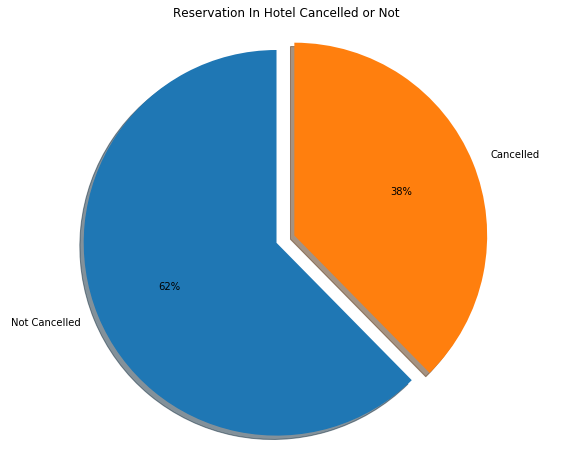

In [11]:
#Pie Chart for is_canceled
plt.rcParams['figure.figsize'] = (10,8)
labels = 'Not Cancelled', 'Cancelled'
sizes = [63,38]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%0.0f%%',
        shadow=True, startangle=90,center=(0, 0))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Reservation In Hotel Cancelled or Not')
plt.show()

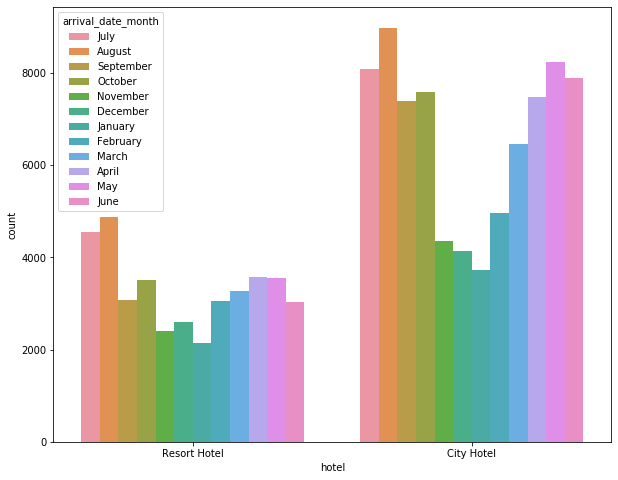

In [12]:
#Monthly Arrival of People
plt.figure(figsize=(10,8))
sns.countplot(x='hotel',hue='arrival_date_month',data=df,)

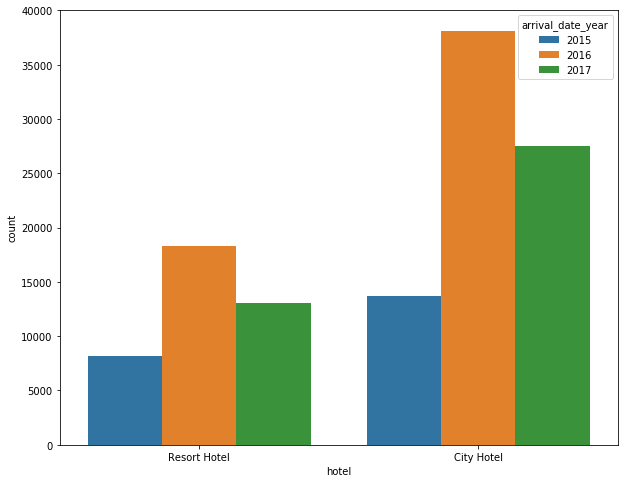

In [13]:
#Yearly Arrival of People
plt.figure(figsize=(10,8))
sns.countplot(x='hotel',hue='arrival_date_year',data=df)

In [14]:
#df.drop(['country'],axis=1)
df.rename(columns={"country": "holiday destination"},inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  object 
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_year               118902 non-null  int64  
 4   arrival_date_month              118902 non-null  object 
 5   arrival_date_week_number        118902 non-null  int64  
 6   arrival_date_day_of_month       118902 non-null  int64  
 7   stays_in_weekend_nights         118902 non-null  int64  
 8   stays_in_week_nights            118902 non-null  int64  
 9   adults                          118902 non-null  int64  
 10  children                        118902 non-null  float64
 11  babies                          118902 non-null  int64  
 12  meal            

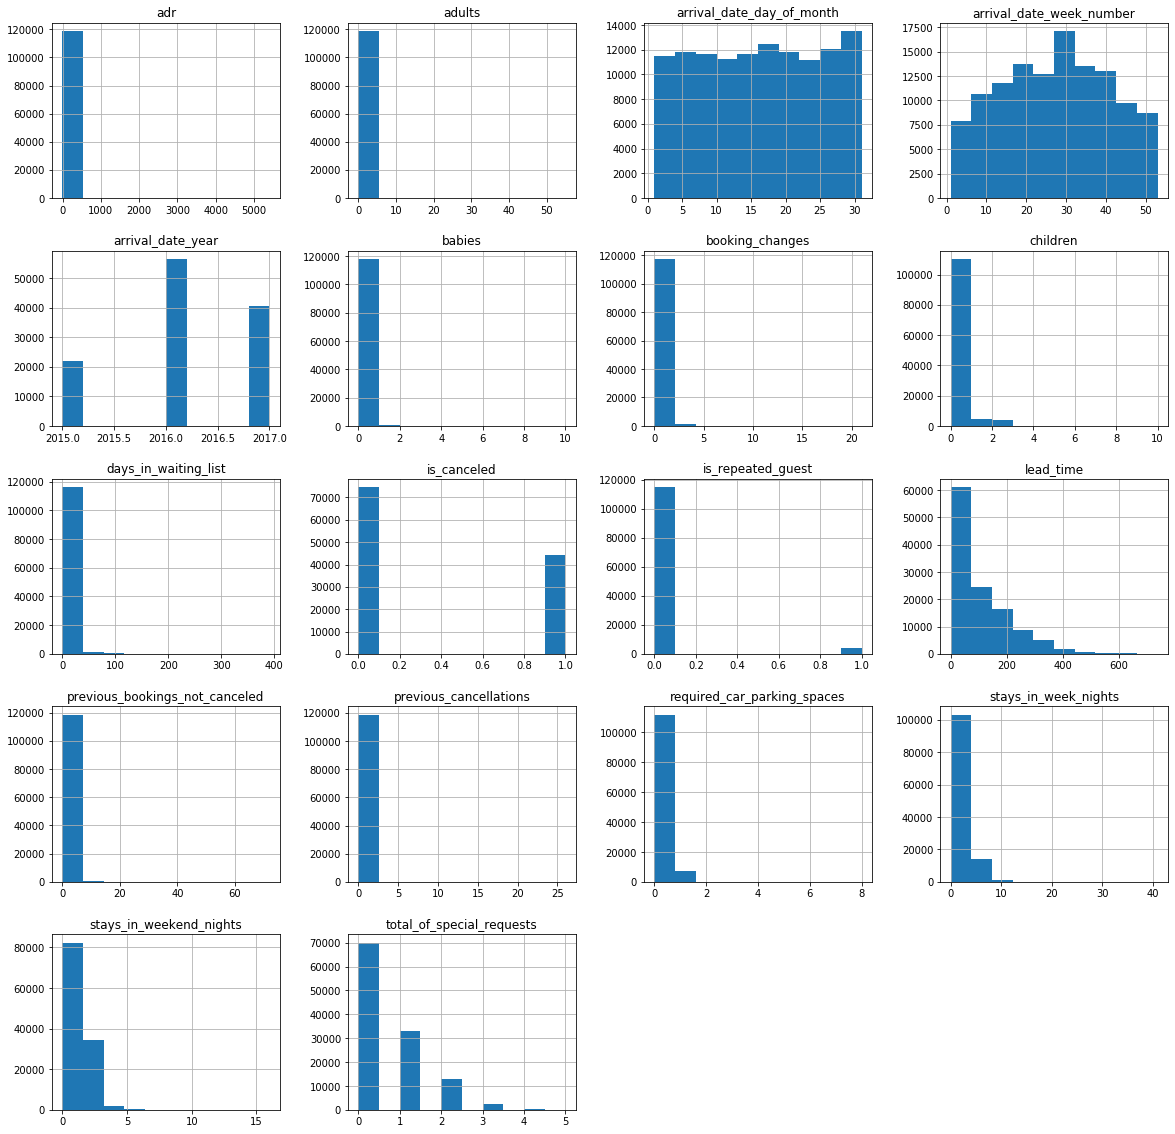

In [16]:
df.hist(figsize=(20,20))
plt.show()

In [17]:
#creating a new column where we will categories holiday destination into popular,best,good,considerable destination
du_dum = pd.DataFrame(columns=['Category_filter'])
df=pd.concat([df, du_dum])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  object 
 1   is_canceled                     118902 non-null  float64
 2   lead_time                       118902 non-null  float64
 3   arrival_date_year               118902 non-null  float64
 4   arrival_date_month              118902 non-null  object 
 5   arrival_date_week_number        118902 non-null  float64
 6   arrival_date_day_of_month       118902 non-null  float64
 7   stays_in_weekend_nights         118902 non-null  float64
 8   stays_in_week_nights            118902 non-null  float64
 9   adults                          118902 non-null  float64
 10  children                        118902 non-null  float64
 11  babies                          118902 non-null  float64
 12  meal            

In [18]:
#formulae using which we will categories our data into 5 different category 
x=( round(((df['holiday destination'].value_counts()/len(df['holiday destination']))*100),2)).to_dict()
x

{'PRT': 40.87,
 'GBR': 10.2,
 'FRA': 8.76,
 'ESP': 7.21,
 'DEU': 6.13,
 'ITA': 3.17,
 'IRL': 2.84,
 'BEL': 1.97,
 'BRA': 1.87,
 'NLD': 1.77,
 'USA': 1.76,
 'CHE': 1.45,
 'CN': 1.08,
 'AUT': 1.06,
 'SWE': 0.86,
 'CHN': 0.84,
 'POL': 0.77,
 'ISR': 0.56,
 'RUS': 0.53,
 'NOR': 0.51,
 'ROU': 0.42,
 'FIN': 0.38,
 'DNK': 0.37,
 'AUS': 0.36,
 'AGO': 0.3,
 'LUX': 0.24,
 'MAR': 0.22,
 'TUR': 0.21,
 'HUN': 0.19,
 'ARG': 0.18,
 'JPN': 0.17,
 'CZE': 0.14,
 'IND': 0.13,
 'KOR': 0.11,
 'GRC': 0.11,
 'DZA': 0.09,
 'SRB': 0.08,
 'HRV': 0.08,
 'MEX': 0.07,
 'IRN': 0.07,
 'EST': 0.07,
 'LTU': 0.07,
 'ZAF': 0.07,
 'BGR': 0.06,
 'NZL': 0.06,
 'COL': 0.06,
 'UKR': 0.06,
 'MOZ': 0.06,
 'CHL': 0.05,
 'SVK': 0.05,
 'THA': 0.05,
 'SVN': 0.05,
 'ISL': 0.05,
 'LVA': 0.05,
 'ARE': 0.04,
 'TWN': 0.04,
 'CYP': 0.04,
 'SAU': 0.04,
 'PHL': 0.03,
 'TUN': 0.03,
 'SGP': 0.03,
 'IDN': 0.03,
 'NGA': 0.03,
 'EGY': 0.03,
 'URY': 0.03,
 'LBN': 0.03,
 'HKG': 0.02,
 'PER': 0.02,
 'MYS': 0.02,
 'ECU': 0.02,
 'BLR': 0.02,
 'VEN':

In [19]:
df['Category_filter']=df['holiday destination'].map(x)
df.tail(20)  

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Category_filter
119370,City Hotel,0.0,201.0,2017.0,August,35.0,30.0,1.0,4.0,1.0,...,0.0,No Deposit,0.0,Transient,108.00,0.0,2.0,Check-Out,2017-09-04,6.13
119371,City Hotel,0.0,175.0,2017.0,August,35.0,31.0,1.0,3.0,2.0,...,1.0,No Deposit,0.0,Transient,86.85,0.0,2.0,Check-Out,2017-09-04,1.77
119372,City Hotel,0.0,175.0,2017.0,August,35.0,31.0,1.0,3.0,1.0,...,0.0,No Deposit,0.0,Transient,82.35,0.0,1.0,Check-Out,2017-09-04,1.77
119373,City Hotel,0.0,175.0,2017.0,August,35.0,31.0,1.0,3.0,1.0,...,0.0,No Deposit,0.0,Transient,82.35,0.0,1.0,Check-Out,2017-09-04,1.77
119374,City Hotel,0.0,201.0,2017.0,August,35.0,29.0,1.0,5.0,2.0,...,0.0,No Deposit,0.0,Transient,117.00,0.0,2.0,Check-Out,2017-09-04,6.13
119375,City Hotel,0.0,200.0,2017.0,August,35.0,30.0,1.0,4.0,2.0,...,0.0,No Deposit,0.0,Transient,85.50,0.0,1.0,Check-Out,2017-09-04,1.06
119376,City Hotel,0.0,165.0,2017.0,August,35.0,29.0,1.0,5.0,3.0,...,0.0,No Deposit,0.0,Transient,209.25,0.0,3.0,Check-Out,2017-09-04,1.06
119377,City Hotel,0.0,185.0,2017.0,August,35.0,30.0,1.0,4.0,2.0,...,0.0,No Deposit,0.0,Transient,99.00,0.0,1.0,Check-Out,2017-09-04,1.45
119378,City Hotel,0.0,247.0,2017.0,August,35.0,31.0,1.0,3.0,2.0,...,0.0,No Deposit,0.0,Transient,86.85,0.0,0.0,Check-Out,2017-09-04,10.20
119379,City Hotel,0.0,109.0,2017.0,August,35.0,31.0,1.0,3.0,2.0,...,0.0,No Deposit,0.0,Transient,155.00,0.0,1.0,Check-Out,2017-09-04,10.20


In [20]:
for i in df['Category_filter']:
    if i >= 10:
        df.loc[df['Category_filter'] == i, 'Category_filter'] = 'Excellent Destination'
    elif i >=1 and i<10:
        df.loc[df['Category_filter'] == i, 'Category_filter'] = 'Popular Destination'
    elif i >=0.01 and i<1:
        df.loc[df['Category_filter'] == i, 'Category_filter'] = 'Best Destination'
    elif i >=0.001 and i < 0.01:
        df.loc[df['Category_filter'] == i, 'Category_filter'] = 'Good Destination'
    else:
        df.loc[df['Category_filter'] == i, 'Category_filter'] = 'Considerable Destination'

KeyboardInterrupt: 

In [21]:
df.tail(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Category_filter
119370,City Hotel,0.0,201.0,2017.0,August,35.0,30.0,1.0,4.0,1.0,...,0.0,No Deposit,0.0,Transient,108.00,0.0,2.0,Check-Out,2017-09-04,Popular Destination
119371,City Hotel,0.0,175.0,2017.0,August,35.0,31.0,1.0,3.0,2.0,...,1.0,No Deposit,0.0,Transient,86.85,0.0,2.0,Check-Out,2017-09-04,Popular Destination
119372,City Hotel,0.0,175.0,2017.0,August,35.0,31.0,1.0,3.0,1.0,...,0.0,No Deposit,0.0,Transient,82.35,0.0,1.0,Check-Out,2017-09-04,Popular Destination
119373,City Hotel,0.0,175.0,2017.0,August,35.0,31.0,1.0,3.0,1.0,...,0.0,No Deposit,0.0,Transient,82.35,0.0,1.0,Check-Out,2017-09-04,Popular Destination
119374,City Hotel,0.0,201.0,2017.0,August,35.0,29.0,1.0,5.0,2.0,...,0.0,No Deposit,0.0,Transient,117.00,0.0,2.0,Check-Out,2017-09-04,Popular Destination
119375,City Hotel,0.0,200.0,2017.0,August,35.0,30.0,1.0,4.0,2.0,...,0.0,No Deposit,0.0,Transient,85.50,0.0,1.0,Check-Out,2017-09-04,Popular Destination
119376,City Hotel,0.0,165.0,2017.0,August,35.0,29.0,1.0,5.0,3.0,...,0.0,No Deposit,0.0,Transient,209.25,0.0,3.0,Check-Out,2017-09-04,Popular Destination
119377,City Hotel,0.0,185.0,2017.0,August,35.0,30.0,1.0,4.0,2.0,...,0.0,No Deposit,0.0,Transient,99.00,0.0,1.0,Check-Out,2017-09-04,Popular Destination
119378,City Hotel,0.0,247.0,2017.0,August,35.0,31.0,1.0,3.0,2.0,...,0.0,No Deposit,0.0,Transient,86.85,0.0,0.0,Check-Out,2017-09-04,Excellent Destination
119379,City Hotel,0.0,109.0,2017.0,August,35.0,31.0,1.0,3.0,2.0,...,0.0,No Deposit,0.0,Transient,155.00,0.0,1.0,Check-Out,2017-09-04,Excellent Destination


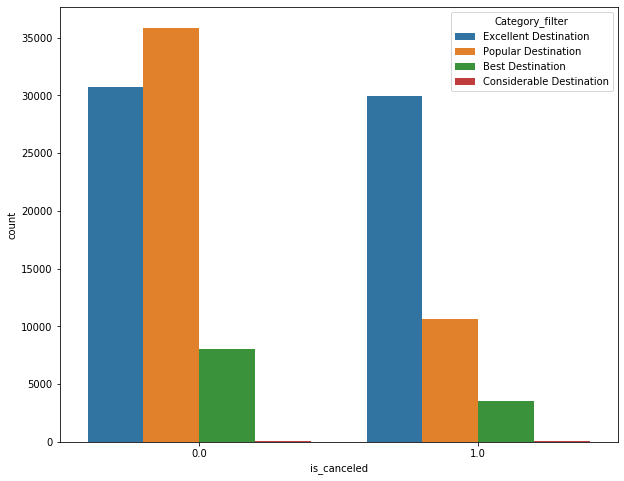

In [22]:
#Holiday Destination and preferred Hotels.
plt.figure(figsize=(10,8))
sns.countplot(x='is_canceled',hue='Category_filter',data=df)

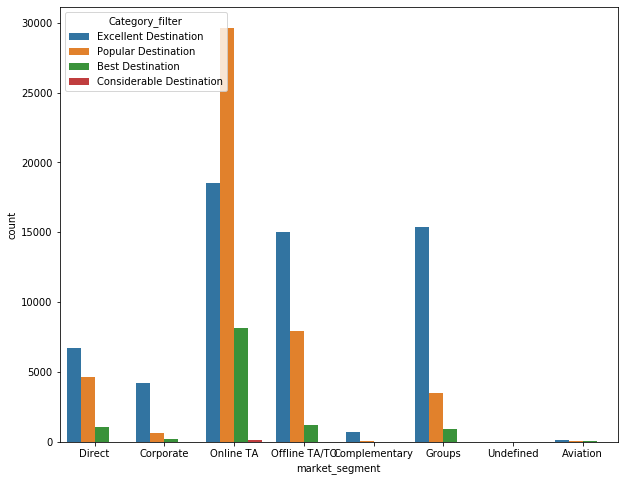

In [23]:
#Market Segment and their preferred Holiday Destination
plt.figure(figsize=(10,8))
sns.countplot(x='market_segment',hue='Category_filter',data=df)

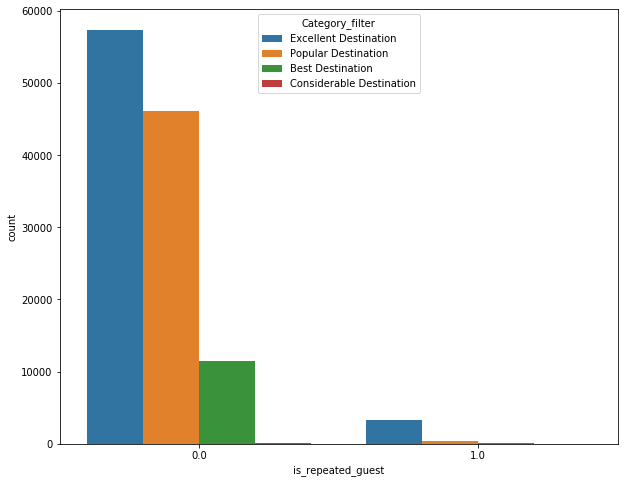

In [24]:
#Checking for repeated guest preferring Holiday Destination.
plt.figure(figsize=(10,8))
sns.countplot(x='is_repeated_guest',hue='Category_filter',data=df)

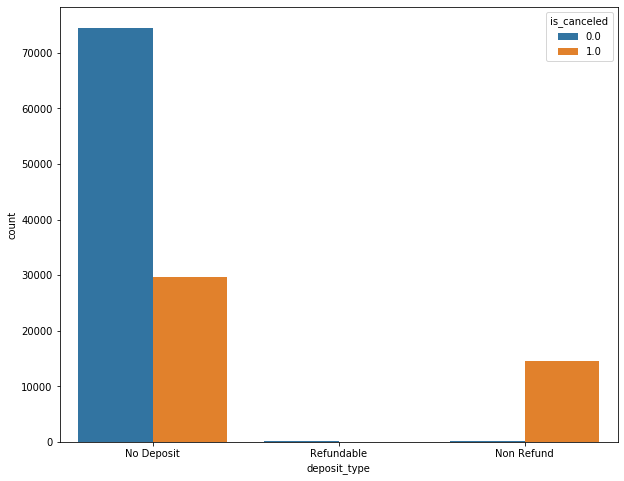

In [25]:
#Checking for repeated guest preferring Holiday Destination.
plt.figure(figsize=(10,8))
sns.countplot(x='deposit_type',hue='is_canceled',data=df)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  object 
 1   is_canceled                     118902 non-null  float64
 2   lead_time                       118902 non-null  float64
 3   arrival_date_year               118902 non-null  float64
 4   arrival_date_month              118902 non-null  object 
 5   arrival_date_week_number        118902 non-null  float64
 6   arrival_date_day_of_month       118902 non-null  float64
 7   stays_in_weekend_nights         118902 non-null  float64
 8   stays_in_week_nights            118902 non-null  float64
 9   adults                          118902 non-null  float64
 10  children                        118902 non-null  float64
 11  babies                          118902 non-null  float64
 12  meal            

In [28]:
y=df['is_canceled']
X=df.drop(['is_canceled','reservation_status','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes'],axis=1,inplace=True)

In [30]:
DF_dummies_hotel = pd.get_dummies(df["hotel"])
DF_dummies_meal =  pd.get_dummies(df["meal"])
DF_dummies_holiday_destination =  pd.get_dummies(df["holiday destination"])
DF_dummies_reserved_room_type =  pd.get_dummies(df["reserved_room_type"])
DF_dummies_assigned_room_type = pd.get_dummies(df["assigned_room_type"])
DF_dummies_customer_type = pd.get_dummies(df["customer_type"])
DF_dummies_Category_filter = pd.get_dummies(df["Category_filter"])
DF_dummies_deposit_type = pd.get_dummies(df["deposit_type"])

DF_dummies_arrival_date_month = pd.get_dummies(df["arrival_date_month"])
DF_dummies_market_segment = pd.get_dummies(df["market_segment"])
DF_dummies_distribution_channel = pd.get_dummies(df["distribution_channel"])
DF_dummies_reservation_status_date = pd.get_dummies(df["reservation_status_date"])

In [31]:
X=df.drop(['hotel','meal','holiday destination','reserved_room_type','assigned_room_type','customer_type','Category_filter','deposit_type','distribution_channel','arrival_date_month','market_segment','reservation_status_date'],axis=1)


In [33]:
X=pd.concat([X, DF_dummies_hotel, DF_dummies_meal, DF_dummies_holiday_destination, DF_dummies_reserved_room_type, DF_dummies_assigned_room_type,DF_dummies_customer_type, DF_dummies_Category_filter, DF_dummies_deposit_type,DF_dummies_arrival_date_month,DF_dummies_market_segment,DF_dummies_distribution_channel,DF_dummies_reservation_status_date],ignore_index=True,axis=1)

X

,0,1,2,3,4,5,6,7,8,9,...,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178
0,342.0,2015.0,27.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
1,737.0,2015.0,27.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
2,7.0,2015.0,27.0,1.0,0.0,1.0,0.0,0.0,75.00,0.0,...,0,0,0,0,0,0,0,0,0,0
3,13.0,2015.0,27.0,1.0,0.0,1.0,0.0,0.0,75.00,0.0,...,0,0,0,0,0,0,0,0,0,0
4,14.0,2015.0,27.0,1.0,0.0,2.0,0.0,0.0,98.00,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23.0,2017.0,35.0,30.0,2.0,5.0,0.0,0.0,96.14,0.0,...,0,0,0,1,0,0,0,0,0,0
119386,102.0,2017.0,35.0,31.0,2.0,5.0,0.0,0.0,225.43,0.0,...,0,0,0,0,1,0,0,0,0,0
119387,34.0,2017.0,35.0,31.0,2.0,5.0,0.0,0.0,157.71,0.0,...,0,0,0,0,1,0,0,0,0,0
119388,109.0,2017.0,35.0,31.0,2.0,5.0,0.0,0.0,104.40,0.0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [35]:
#Scaling X_test and X_train
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [36]:
#Using Logistic Regression 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print("Accuracy =",accuracy_score(y_test,y_pred))
print("Precision =",precision_score(y_test,y_pred))
print("Recall =",recall_score(y_test,y_pred))
print("F1 Score =",f1_score(y_test,y_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[14971    45]
 [  893  7872]]
Accuracy = 0.9605567469828855
Precision = 0.9943160287987874
Recall = 0.8981175128351397
F1 Score = 0.9437717300083923


In [37]:
#Using Decison Tree 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(confusion_matrix(y_test,predictions))
print("Accuracy =",accuracy_score(y_test,predictions))
print("Precision =",precision_score(y_test,predictions))
print("Recall =",recall_score(y_test,predictions))
print("F1 Score =",f1_score(y_test,predictions))

[[13654  1362]
 [ 1465  7300]]
Accuracy = 0.8811235860560952
Precision = 0.8427614869545139
Recall = 0.8328579577866515
F1 Score = 0.8377804556148505


In [38]:
#Using Random Forest 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc__pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc__pred))
print("Accuracy =",accuracy_score(y_test,rfc__pred))
print("Precision =",precision_score(y_test,rfc__pred))
print("Recall =",recall_score(y_test,rfc__pred))
print("F1 Score =",f1_score(y_test,rfc__pred))

[[14354   662]
 [ 1663  7102]]
Accuracy = 0.9022328749842311
Precision = 0.9147346728490469
Recall = 0.8102681118083286
F1 Score = 0.8593381329784016
